# Search: Solving a maze

Total Points: 10


The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

Here is the small example maze:

In [3]:
f = open("small_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Notes:__ 
* This is a planing exercise, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.
* Tree search algorithm implementations that you find online have often a different aim. The algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 
* Some mazes may contain cycles and therefore not form proper trees unless cycles are prevented. 

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation.

In [11]:
%run maze_helper.py

maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)`
print("Position(8,1):", look(maze, [8, 1]))

Position(0,0): X
Position(8,1): G


Visualize the maze

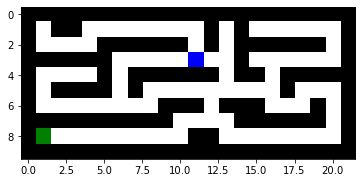

In [5]:
show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [8]:
print("Start location:", find_pos(maze, what = "S"))
print("Goal location:", find_pos(maze, what = "G"))

Start location: [3, 11]
Goal location: [8, 1]


## Tree structures

A basic tree implementation in Python is available at https://github.com/yoyzhou/pyTree (found by John Park).


# Tasks

Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Iterative deepening search (IDS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[empty maze](empty_maze.txt), 
[wall maze](wall_maze.txt), 
and the 
[loops maze](loops_maze.txt). 
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

#### My components as follows:
1) Initial State: For the initial state, the agent starts at the marked starting position according to the maze in question. This is signified by a S in the maze or a blue square as seen in visualizations.

2) Actions: For the actions that my agent can take, it can either go up, right, down, or left so long as a wall does not block the direction. These are hard set by the maze but the actions are also limited by which squares have already been visited. The agent will not go over previously visited squares.

3) Transition Model: For the transition model, a successive state is achieved by whatever action the agent chooses to perform. Each successive state that is achieved by the agent may not be logical from a birds eye view but the agent should ultimately be able to reach the goal through these states.

4) Goal State: The goal state here is the ending position as marked by the maze. This is signified by a G in the maze or a green square as seen in visualizations.

5) Path Cost: The path cost in this problem is the number of steps taken from the starting position to the goal position. This can be seen as a red line in the visualizations once a given maze has been solved. Here, each step has a cost of 1.

## Task 2: Breadth-first, Depth-first and iterative deepening search [4 points]

Implement these search strategies. You can implement a generic tree search following the BFS pseudo-code in your textbook and then just adapt the order in which the frontier is explored.

### Helper Functions and Initialization
Below are some helper functions and initialization of the maze.

X


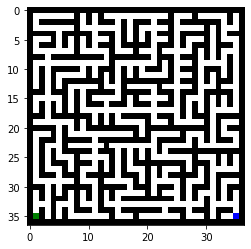

In [82]:
from pyTree.Tree import Tree
import numpy as np

# open and run our maze helper file which allows us to parse and visualize the maze
%run maze_helper.py

# define the maze names
maze_names = {
    "small": "small_maze.txt",
    "medium": "medium_maze.txt",
    "large": "large_maze.txt",
    "open": "open_maze.txt",
    "empty": "empty_maze.txt",
    "wall": "wall_maze.txt",
    "loops": "loops_maze.txt"
}
# define maze variable
global maze
# initialize maze
def load_maze(name):
    # open the maze file and read it in
    maze_read = open(maze_names[name], "r").read()
    # parse the maze
    return(parse_maze(maze_read))
# quick visualization test    
maze = load_maze("large")
print(maze[8,1])
show_maze(maze)

In [11]:
# function to find position of given value in maze, used for start and goal, finds first occurance
def find_position(maze, loc = "S"):
    pos_tuple = np.where(maze == loc)
    pos_x = pos_tuple[0][0]
    pos_y = pos_tuple[1][0]
    return([pos_x, pos_y])

find_position(maze, "S")

[3, 11]

In [33]:
# function to check what square at given position is
def check_square(maze, pos):
    return(maze[pos[0], pos[1]])

check_square(maze, [3,11])

'S'

In [38]:
# find all available moves in a given square by checking for "X" in all adjacent squares
def available_moves(maze, pos, strat = "random"):
    adjacent_locs = np.add(pos, [[-1,0], [0,1], [1,0], [0,-1]])[::-1]
    
    if(strat != "left"):
        np.random.shuffle(adjacent_locs)
        
    possible_moves = [ pos_ok.tolist() for pos_ok in adjacent_locs if check_square(maze,pos_ok) != "X" ]
    
    return possible_moves
    
available_moves(maze, (3,11), strat="left")

[[3, 10], [3, 12], [2, 11]]

In [39]:
# obtain path that has been travelled already
def obtain_path(node):
    path = []
    path.append(node.data)
    
    while not node.isRoot():
        node = node.getParent()
        path.append(node.data)
        
    path.reverse()
    return(path)

In [72]:
# show chosen path in end and also what areas were reached
def show_path(maze, path, reached = []):
    maze_copy = np.copy(maze)
    
    for pos in path:
        if(maze_copy[pos[0],pos[1]] == " "):
            maze_copy[pos[0],pos[1]] = "P"
           
    for pos in reached:
        if (maze_copy[pos[0],pos[1]] == " "):
            maze_copy[pos[0],pos[1]] = "."
            
    show_maze(maze_copy)

### Heuristics
Below will be the heuristic functions used when making decisions

In [41]:
# finds path length to given node n
def g(n):
    return(len(obtain_path(n))-1)

In [42]:
# finds manhattan distance
def manhattan(pos1, pos2):
    return(np.sum(np.abs(np.subtract(pos1,pos2))))

In [43]:
# finds euclidean distance
def euclidean(pos1, pos2):
    return(np.sqrt(np.sum(np.square(np.subtract(pos1,pos2)))))

In [44]:
# finds location with minimum move
def min_move(x):
    return(np.random.choice(np.where(x == np.amin(x))[0]))

### Tree Search Function
This function includes implementations for BFS, DFS, IDFS, GBFS Manhattan, and A* Manhattan

In [149]:
def tree_search(maze, strat = "BFS", debug = False, visualize = False):
    # obtain start and goal positions
    start_pos = find_position(maze, "S")
    end_pos = find_position(maze, "G")
    
    if(visualize):
        maze_vis = np.copy(maze)
        
    # set start as root
    root = Tree(data = start_pos)
    # set up frontier list
    frontier = []
    frontier.append(root)
    # set up reached list
    reached = dict()
    reached[tuple(root.data)] = root
    # keep track of max variables
    max_frontier = 0
    max_depth = 0
    # parameters for IDS
    limit_depth_IDS = 0
    # set current node to root since we are just starting
    node = root
    # loop until nothing left in frontier or goal is reached
    while not (len(frontier) < 1):
        # update max frontier size
        if(len(frontier) > max_frontier):
            max_frontier = len(frontier)
            if(debug):
                print("New Max Frontier Length: {}".format(max_frontier))
        if(debug):
            print("Frontier: {}".format([n.data for n in frontier]))
        # choose how to move forward with frontier choice based on strategy
        if(strat == "BFS"):
            # FIFO - Wide
            node = frontier.pop(0)
        elif(strat == "DFS"):
            # LIFO - Deep
            node = frontier.pop(-1)
        elif(strat == "IDS"):
            # LIFO modified - will go deep until limit reached and then expand wide (see below)
            node = frontier.pop(-1)
        elif(strat == "GBFSM"):
            h_n = [manhattan(n.data, end_pos) for n in frontier]
            if(debug):
                print("GBFS manhattan h(n): {}".format(h_n))
            node = frontier.pop(min_move(h_n))
        elif(strat == "A*M"):
            f_n = [g(n) + manhattan(n.data, end_pos) for n in frontier]
            if(debug):
                print("A* manhattan f(n): {}".format(f_n))
            node = frontier.pop(min_move(f_n))
        else:
            print("UNKNOWN STRATEGY!")
            return(None)
        # check to see if reached goal state
        if(check_square(maze, node.data) == "G"):
            return({
                "path": obtain_path(node),
                "reached": reached.keys(),
                "max-frontier": max_frontier,
                "max-depth": max_depth
            })
        # if not reached goal state, expand chosen node
        else:
            if(debug):
                print("Expanding node: {}".format(node.data))
            # if IDS and limit has been reached and frontier is empty, reset to root and increase limit by 1
            #    otherwise, if limit has been reached and frontier still has values, check & expand on those
            #    values
            if(strat == "IDS"):
                if((g(node) == limit_depth_IDS)):
                    if(debug): 
                        print("LIMIT REACHED: ", g(node))
                    if(len(frontier) == 0):
                        root = Tree(data = start_pos)
                        frontier = [root]
                        reached = dict()
                        reached[tuple(root.data)] = root
                        if(visualize):
                            maze_vis = np.copy(maze)
                        limit_depth_IDS = limit_depth_IDS + 1
                    continue
            # go through list of available moves
            for pos in available_moves(maze, node.data):
                # if the available position is in the reached locations and is shorter path, dont add to frontier
                #  prevents getting stuck in a rabbit hole
                if(strat in ["DFS", "GBFS-M", "GBFS-E", "IDS"]):
                    if(tuple(pos) in reached.keys()):
                        if(g(reached[tuple(pos)]) <= g(node)+1):
                            continue
                elif(tuple(pos) in reached.keys()):
                    continue
                # if the available position has not already been added to frontier or is better
                n = Tree(data = pos)
                node.addChild(n)
                if(g(n) > max_depth):
                    max_depth = g(n)
                    if(debug):
                        print("New Max Depth: {}".format(max_depth))
                frontier.append(n)
                reached[tuple(pos)] = n
                if(visualize):
                    maze_vis[pos[0], pos[1]] = "."
            # prevents getting stuck in loops with IDS, this is because the algorithm may run
            #   into another path when the limit has not been reached and due to the reached
            #   dictionary, the algorithm will result in an empty frontier, exiting the search
            if(strat == "IDS" and len(frontier) == 0):
                root = Tree(data = start_pos)
                frontier = [root]
                reached = dict()
                reached[tuple(root.data)] = root
                if(visualize):
                    maze_vis = np.copy(maze)
                limit_depth_IDS = limit_depth_IDS + 1
            
            if(debug):
                print("Adding {} to frontier list.".format([n.data for n in node.getChildren()]))
            
            if(visualize):
                # update visualization with path chosen
                if(maze_vis[node.data[0], node.data[1]] == "."):
                    maze_vis[node.data[0], node.data[1]] = "P"
                show_maze(maze_vis)
                
    # always return at least something :-)            
    return(None)

In [152]:
# function to nicely run a list of strategies
def maze_runner(strategies):
    print("_________________________________________________________________\n")
    for cur_strat in strategies:
        print("Strategy: {}\n".format(cur_strat))
        for cur_maze in maze_names.keys():
            maze = load_maze(cur_maze)
            results = tree_search(maze, strat = cur_strat, debug = False, visualize = False)
            print("Maze: {}".format(cur_maze))
            print("Path cost: {}".format(len(results["path"])-1))
            print("Squares Explored: {}".format(len(results["reached"])))
            print("Max Frontier: {}".format(results["max-frontier"]))
            print("Max Depth: {}".format(results["max-depth"]))
            show_path(maze, results["path"], results["reached"])
        print("_________________________________________________________________\n")

_________________________________________________________________

Strategy: BFS

Maze: small
Path cost: 19
Squares Explored: 93
Max Frontier: 8
Max Depth: 19


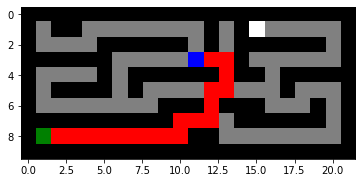

Maze: medium
Path cost: 68
Squares Explored: 272
Max Frontier: 9
Max Depth: 69


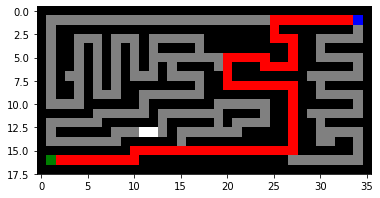

Maze: large
Path cost: 210
Squares Explored: 625
Max Frontier: 9
Max Depth: 211


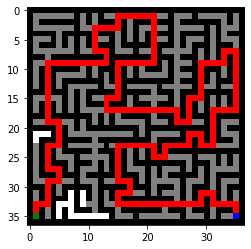

Maze: open
Path cost: 54
Squares Explored: 684
Max Frontier: 25
Max Depth: 54


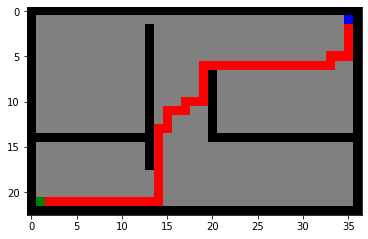

Maze: empty
Path cost: 14
Squares Explored: 98
Max Frontier: 12
Max Depth: 15


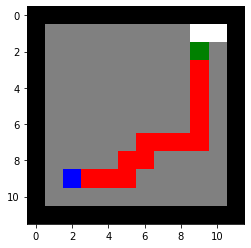

Maze: wall
Path cost: 14
Squares Explored: 91
Max Frontier: 10
Max Depth: 15


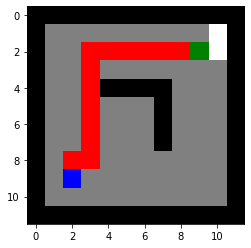

Maze: loops
Path cost: 23
Squares Explored: 72
Max Frontier: 8
Max Depth: 23


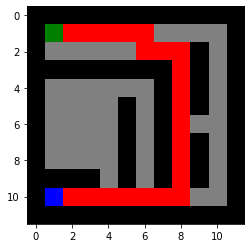

_________________________________________________________________

Strategy: DFS

Maze: small
Path cost: 29
Squares Explored: 77
Max Frontier: 6
Max Depth: 48


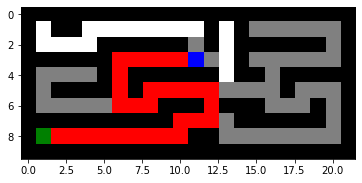

Maze: medium
Path cost: 74
Squares Explored: 82
Max Frontier: 7
Max Depth: 74


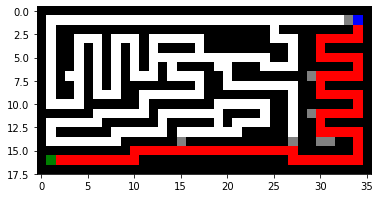

Maze: large
Path cost: 210
Squares Explored: 443
Max Frontier: 33
Max Depth: 214


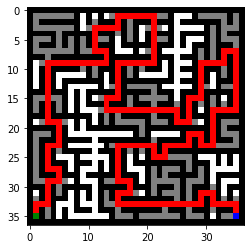

Maze: open
Path cost: 120
Squares Explored: 268
Max Frontier: 122
Max Depth: 122


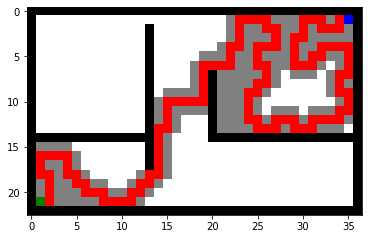

Maze: empty
Path cost: 24
Squares Explored: 100
Max Frontier: 34
Max Depth: 36


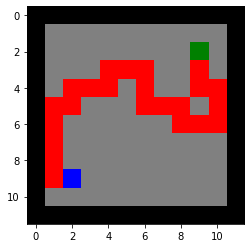

Maze: wall
Path cost: 28
Squares Explored: 91
Max Frontier: 33
Max Depth: 49


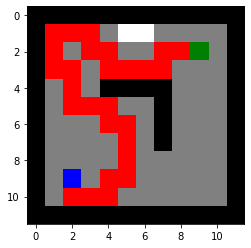

Maze: loops
Path cost: 29
Squares Explored: 66
Max Frontier: 10
Max Depth: 29


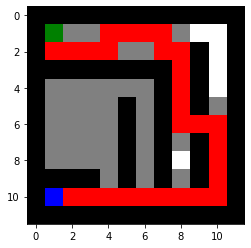

_________________________________________________________________

Strategy: IDS

Maze: small
Path cost: 19
Squares Explored: 58
Max Frontier: 7
Max Depth: 20


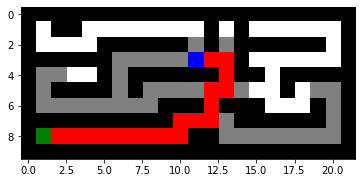

Maze: medium
Path cost: 68
Squares Explored: 225
Max Frontier: 9
Max Depth: 69


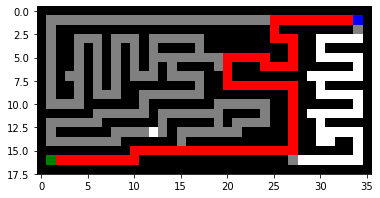

Maze: large
Path cost: 210
Squares Explored: 517
Max Frontier: 42
Max Depth: 211


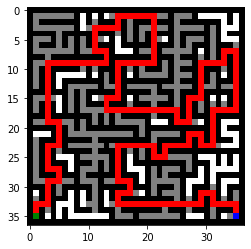

Maze: open
Path cost: 54
Squares Explored: 683
Max Frontier: 64
Max Depth: 55


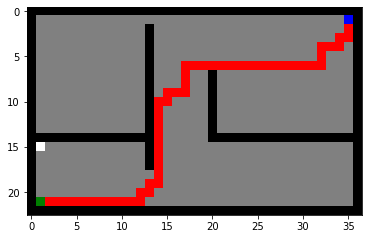

Maze: empty
Path cost: 14
Squares Explored: 97
Max Frontier: 19
Max Depth: 15


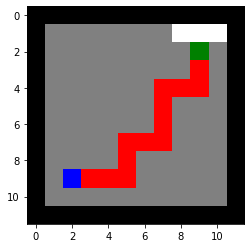

Maze: wall
Path cost: 14
Squares Explored: 90
Max Frontier: 16
Max Depth: 15


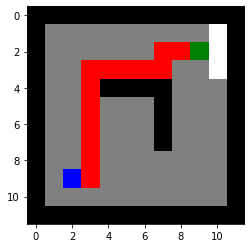

Maze: loops
Path cost: 23
Squares Explored: 71
Max Frontier: 11
Max Depth: 24


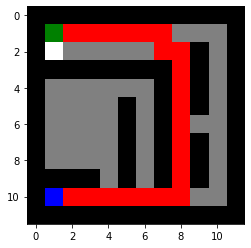

_________________________________________________________________



In [154]:
# running algorithm for BFS, DFS, and IDS
strategies = ["BFS", "DFS", "IDS"]
maze_runner(strategies)

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each?

- __BFS__

    Is it complete? Yes, the BFS searching strategy as implemented in our case is complete. This is because it will always find a solution eventually and does so by going down one level in search and expanding all nodes on that level before moving to the next level.

    Is is optimal? Yes, BFS will always find the same cost of a given problem regardless of however many iterations are run. It will always find the best solution but may end up searching the whole maze in doing so.

    What is the time complexity? The time complexity of BFS is $O(b^{d})$ with b corresponding to the branching factor and d corresponding to the depth. This is because at each level of depth, the associated search tree generated b nodes. Thus the root generates b nodes followed by the second level that generates b nodes again for a total of $b^2$. This pattern continues and can be shown by the equation $b + b^2 + b^3 + ... + b^d = O(b^d)$.

    What is the space complexity? The space complexity of BFS is also $O(b^{d})$ with b corresponding to the branching factor and d corresponding to the depth. The explanation for this can be seen above as the time and space complexities are the same.

    
- __DFS__

    Is it complete? Yes and no, for tree searching problems in order for DFS to be complete, it must be slightly altered so that it doesnt get stuck in Arad-Sibiu loops by checking new states against what has already been covered. This prevents it from running infinite loops but only in a finite state spaces, if the state space is not finite it will fall victim to looping. Additionally, this modification does not prevent against the proliferation of redundant paths either. For this purposes of this lab it will be complete.

    Is is optimal? No, DFS is not optimal because it will simply return the first path that reaches its goal. It most cases it will just keep going down one path and regardless of step cost, if it finds a solution at the end it will not explore the other options and mark that path as the solution.

    What is the time complexity? The time complexity of DFS is $O(b^m)$ where b corresponds to the branching factor and m corresponds to the max depth of any node. This is because like BFS, DFS would have an equation that looks like $1 + b + b^2 + b^3 + ... + b^m = O(b^m)$ where $b^m$ is the deepest node of the tree.

    What is the space complexity? The space complexity of DFS $O(bm)$ where b corresponds to the branching factor and m corresponds to the max depth of any node. This is because, DFS only stores a single path from the root node to the leaf node along with any unexpanded sibling nodes for each node on the path. We only need to store, b nodes for each of the m nodes down a given branch resulting in $O(bm)$.


- __IDS__

    Is it complete? Yes, the IDS searching strategy as implemented in our case is complete. This is because it will always find a solution as long as the branching factor is finite.

    Is is optimal? Yes, IDS will be optimal in finding a solution so long as the path cost is a nondecreasing function of the depth of the node. Each step has the same cost of 1 here. IDS takes strategies from both BFS and DFS which attributes to why it seems similar.

    What is the time complexity? The time complexity of IDS is $O(b^d)$ where b corresponds to the branching factor and d corresponds to the max depth of any node. This time complexity is very similar to BFS due to the fact that it is a hybrid of BFS and DFS. The nodes at the bottom level (depth d) are generated once with the ones on the next level up being generated twice and so on so forth till it reaches the children of the root where they are generated d times. Thus our equation is as follows: $(d)b + (d-1)b^2 + ... + (1)b^d = O(b^d)$ which results to be the same as BFS.

    What is the space complexity? The space complexity of IDS is $O(bd)$ where b corresponds to the branching factor and d corresponds to the depth of the solution. This is actually better than DFS. This space complexity can be attributed to the limited deepening factor that is set forth by the algorithm. It will only perform DFS to a certain limit before it employs BFS to search at that limit. The result is many iterations of the algorithm due to the need of restarts once a depth limit is reached.


## Task 3: Greedy best-first search [2 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function.

_________________________________________________________________

Strategy: GBFSM

Maze: small
Path cost: 29
Squares Explored: 44
Max Frontier: 5
Max Depth: 29


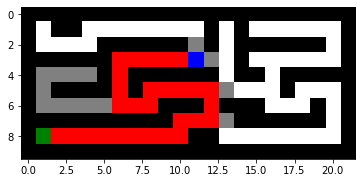

Maze: medium
Path cost: 74
Squares Explored: 82
Max Frontier: 4
Max Depth: 74


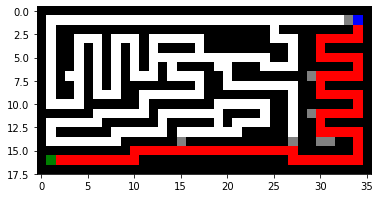

Maze: large
Path cost: 210
Squares Explored: 483
Max Frontier: 23
Max Depth: 210


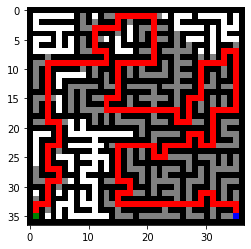

Maze: open
Path cost: 68
Squares Explored: 166
Max Frontier: 83
Max Depth: 68


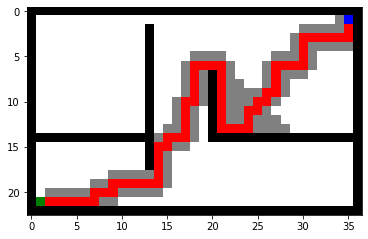

Maze: empty
Path cost: 14
Squares Explored: 43
Max Frontier: 29
Max Depth: 14


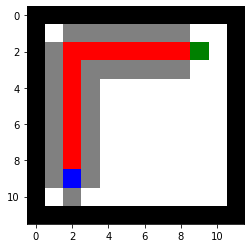

Maze: wall
Path cost: 14
Squares Explored: 44
Max Frontier: 26
Max Depth: 14


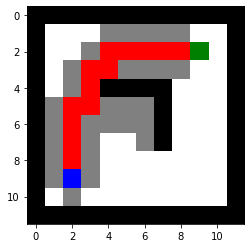

Maze: loops
Path cost: 23
Squares Explored: 60
Max Frontier: 9
Max Depth: 23


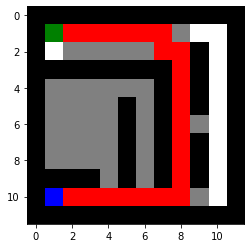

_________________________________________________________________



In [106]:
strategies = ["GBFSM"]

maze_runner(strategies)

Is this implementation complete and optimal? What is the time and space complexity?

Is it complete? The Greedy Best First Search (GBFS) is not complete in most cases as it tends to get stuck in loops or revisits nodes. However, in our case it actually is complete and this is due to the fact that we keep track of what nodes that we have already reached when seaching.

Is is optimal? GBFS is not optimal either due to the fact that at each step all it tries to do is reach the goal state by moving in the direction of it. It does not take into account anything that may be blocking its path and can take a not so good solution sometimes.

What is the time complexity? GBFS has a worst and best case time complexity. For worst case, it's time complexity will be $O(b^m)$ where b is the branching factor and m is the max depth searched. This time complexity is actually comparable to DFS as seen above. However, for the best case, it's time complexity can be reduced to $O(bd)$ where b is the branching factor and d is the depth of the optimal solution found. This would require a really good heuristic function that is near perfect in determining the cost associated between two nodes.

What is the space complexity? Just like the time complexity, GBFS has a worst and best case time complexity and they happen to be the same too. For worst case, it's time complexity will be $O(b^m)$ where b is the branching factor and m is the max depth searched. For best case, it's time complexity will be $O(bd)$ where b is the branching factor and d is the depth of the optimal solution found. As mentioned above, this would require a really good heuristic function that is near perfect in determining the cost associated between two nodes.


## Task 4: A* Search [3 points]

Use again the Manhattan heuristic function.

_________________________________________________________________

Strategy: A*M

Maze: small
Path cost: 19
Squares Explored: 53
Max Frontier: 8
Max Depth: 19


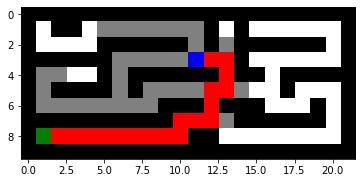

Maze: medium
Path cost: 68
Squares Explored: 228
Max Frontier: 8
Max Depth: 68


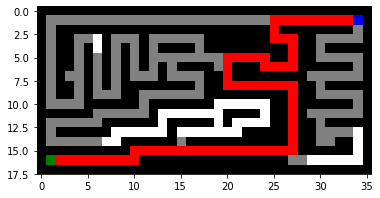

Maze: large
Path cost: 210
Squares Explored: 557
Max Frontier: 12
Max Depth: 210


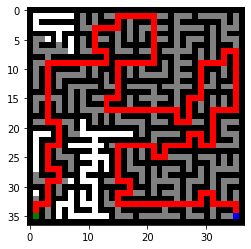

Maze: open
Path cost: 54
Squares Explored: 377
Max Frontier: 98
Max Depth: 54


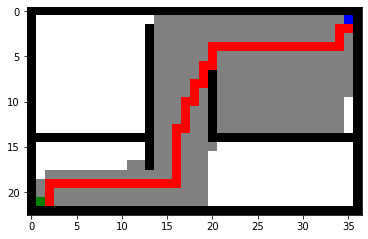

Maze: empty
Path cost: 14
Squares Explored: 70
Max Frontier: 30
Max Depth: 14


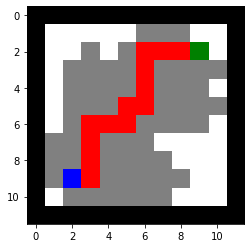

Maze: wall
Path cost: 14
Squares Explored: 82
Max Frontier: 35
Max Depth: 14


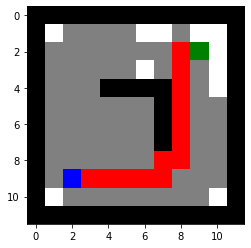

Maze: loops
Path cost: 23
Squares Explored: 61
Max Frontier: 9
Max Depth: 23


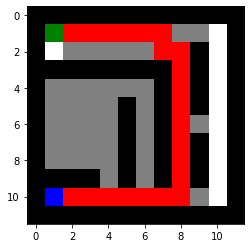

_________________________________________________________________



In [107]:
strategies = ["A*M"]

maze_runner(strategies)

Is this implementation complete and optimal? What is the time and space complexity?

Is it complete? Yes, A* is complete so long as the provided heuristic function satisfies a certain condition in tree-based search. This condition is that the heuristic function must be admissible, this means that it will never overestimate the cost to reach the goal. Additionally, there must be some finite number of nodes in the search space.

Is is optimal? Yes, A* is also optimal due to the same reason that it is complete. So long as the heuristic function is admissible in its nature, A* should return the optimal result. 

What is the time and space complexity? The time and space complexity of A* will be exponential in most cases, although it is entirely dependent on the heuristic function. This can be seen by the following equation for a tree-based search $O(b^{(h^* - h)})$ where b is the branching factor, $h^*$ is the actual cost of getting from the root to the goal, and h is the estimated cost of getting to the goal. This eventually simplifies down to $O(b^d)$ where d is the depth of the solution and b is the branching factor. Thus this implies an exponential time complexity.

### Tables of Data

Don't forget to add a table that compares the following for the algorithms on the different mazes:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

df_init = pd.DataFrame({'Strategy': [],'Path Cost': [],'Squares Explored': [],'Max Frontier Size': [],'Max Depth': []})

strategies = ["BFS", "DFS", "IDS", "GBFSM", "A*M"]

for cur_maze in maze_names.keys():
    df = df_init
    for cur_strat in strategies:
        maze = load_maze(cur_maze)
        results = tree_search(maze, strat = cur_strat, debug = False, visualize = False)
        df = df.append({
            'Strategy': cur_strat,
            'Path Cost': (len(results["path"])-1),
            'Squares Explored': (len(results["reached"])),
            'Max Frontier Size': results["max-frontier"],
            'Max Depth': results["max-depth"]
        }, ignore_index=True)
    print("Current Maze: {}".format(cur_maze))
    display(df)
    
    # I tried my very best to get this to graph but it always came out werid. :-(
    #hist = df.hist(figsize = (15,5), bins= 40, layout=(1,4), grid=False)
    

Current Maze: small


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,19.0,93.0,9.0,19.0
1,DFS,49.0,85.0,6.0,49.0
2,IDS,19.0,47.0,7.0,20.0
3,GBFSM,29.0,44.0,5.0,29.0
4,A*M,19.0,58.0,8.0,19.0


Current Maze: medium


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,68.0,272.0,9.0,69.0
1,DFS,74.0,82.0,7.0,74.0
2,IDS,68.0,273.0,8.0,69.0
3,GBFSM,74.0,82.0,4.0,74.0
4,A*M,68.0,228.0,8.0,68.0


Current Maze: large


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,210.0,623.0,8.0,210.0
1,DFS,210.0,420.0,39.0,210.0
2,IDS,210.0,482.0,42.0,211.0
3,GBFSM,210.0,486.0,22.0,210.0
4,A*M,210.0,556.0,12.0,210.0


Current Maze: open


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,54.0,684.0,25.0,54.0
1,DFS,126.0,276.0,138.0,126.0
2,IDS,54.0,683.0,68.0,55.0
3,GBFSM,64.0,161.0,72.0,64.0
4,A*M,54.0,391.0,72.0,54.0


Current Maze: empty


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,14.0,98.0,12.0,15.0
1,DFS,22.0,98.0,44.0,38.0
2,IDS,14.0,92.0,20.0,15.0
3,GBFSM,14.0,40.0,26.0,14.0
4,A*M,14.0,92.0,39.0,14.0


Current Maze: wall


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,14.0,91.0,10.0,15.0
1,DFS,36.0,87.0,36.0,45.0
2,IDS,14.0,90.0,18.0,15.0
3,GBFSM,18.0,47.0,25.0,18.0
4,A*M,14.0,80.0,31.0,14.0


Current Maze: loops


,Strategy,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,BFS,23.0,72.0,7.0,23.0
1,DFS,41.0,68.0,16.0,43.0
2,IDS,23.0,46.0,11.0,24.0
3,GBFSM,23.0,60.0,9.0,23.0
4,A*M,23.0,62.0,8.0,23.0


## Bonus Tasks [+1 point]

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [11]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [170]:
def modified_astar(maze, weight = 5, debug = False, visualize = False):
    # obtain start and goal positions
    start_pos = find_position(maze, "S")
    end_pos = find_position(maze, "G")
    
    if(visualize):
        maze_vis = np.copy(maze)
        
    # set start as root
    root = Tree(data = start_pos)
    # set up frontier list
    frontier = []
    frontier.append(root)
    # set up reached list
    reached = dict()
    reached[tuple(root.data)] = root
    # keep track of max variables
    max_frontier = 0
    max_depth = 0
    # parameters for IDS
    limit_depth_IDS = 0
    # set current node to root since we are just starting
    node = root
    # loop until nothing left in frontier or goal is reached
    while not (len(frontier) < 1):
        # update max frontier size
        if(len(frontier) > max_frontier):
            max_frontier = len(frontier)
            if(debug):
                print("New Max Frontier Length: {}".format(max_frontier))
        if(debug):
            print("Frontier: {}".format([n.data for n in frontier]))
        # MODIFICATION --- here is where we apply the weight to the heuristic
        f_n = [g(n) + (weight * manhattan(n.data, end_pos)) for n in frontier]
        if(debug):
            print("A* manhattan f(n): {}".format(f_n))
        node = frontier.pop(min_move(f_n))

        # check to see if reached goal state
        if(check_square(maze, node.data) == "G"):
            return({
                "path": obtain_path(node),
                "reached": reached.keys(),
                "max-frontier": max_frontier,
                "max-depth": max_depth
            })
        # if not reached goal state, expand chosen node
        else:
            if(debug):
                print("Expanding node: {}".format(node.data))
            # go through list of available moves
            for pos in available_moves(maze, node.data):
                if(tuple(pos) in reached.keys()):
                    continue
                # if the available position has not already been added to frontier or is better
                n = Tree(data = pos)
                node.addChild(n)
                if(g(n) > max_depth):
                    max_depth = g(n)
                    if(debug):
                        print("New Max Depth: {}".format(max_depth))
                frontier.append(n)
                reached[tuple(pos)] = n
                if(visualize):
                    maze_vis[pos[0], pos[1]] = "."
            if(debug):
                print("Adding {} to frontier list.".format([n.data for n in node.getChildren()]))
            
            if(visualize):
                # update visualization with path chosen
                if(maze_vis[node.data[0], node.data[1]] == "."):
                    maze_vis[node.data[0], node.data[1]] = "P"
                show_maze(maze_vis)
                
    # always return at least something :-)            
    return(None)

Maze: small
Path cost: 29
Squares Explored: 46
Max Frontier: 5
Max Depth: 29


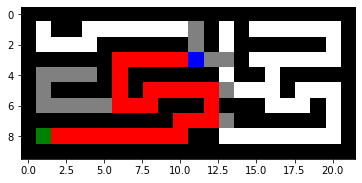

Maze: medium
Path cost: 74
Squares Explored: 82
Max Frontier: 4
Max Depth: 74


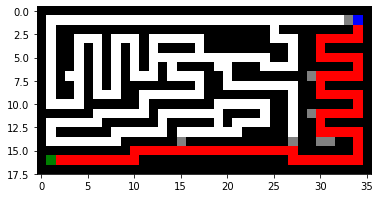

Maze: large
Path cost: 210
Squares Explored: 499
Max Frontier: 24
Max Depth: 210


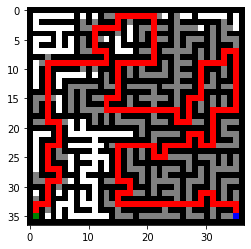

Maze: open
Path cost: 54
Squares Explored: 155
Max Frontier: 77
Max Depth: 54


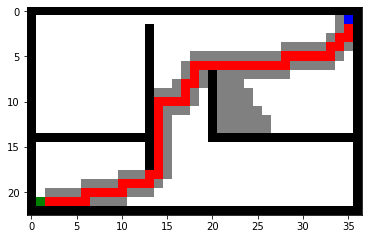

Maze: empty
Path cost: 14
Squares Explored: 41
Max Frontier: 27
Max Depth: 14


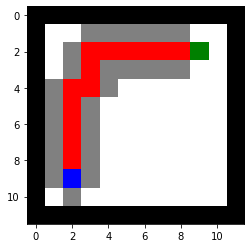

Maze: wall
Path cost: 14
Squares Explored: 40
Max Frontier: 26
Max Depth: 14


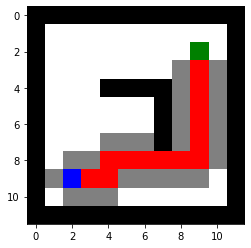

Maze: loops
Path cost: 23
Squares Explored: 60
Max Frontier: 9
Max Depth: 23


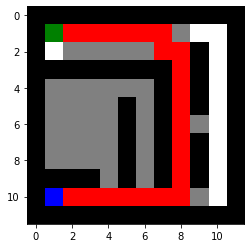

In [176]:
for cur_maze in maze_names.keys():
    maze = load_maze(cur_maze)
    results = modified_astar(maze, weight = 5, debug = False, visualize = False)
    print("Maze: {}".format(cur_maze))
    print("Path cost: {}".format(len(results["path"])-1))
    print("Squares Explored: {}".format(len(results["reached"])))
    print("Max Frontier: {}".format(results["max-frontier"]))
    print("Max Depth: {}".format(results["max-depth"]))
    show_path(maze, results["path"], results["reached"])

In [180]:
df_init_2 = pd.DataFrame({'Maze': [], 'Path Cost': [],'Squares Explored': [],'Max Frontier Size': [],'Max Depth': []})
weights = [2,3,5,8]
for w in weights:
    df_2 = df_init_2
    for cur_maze in maze_names.keys():
        maze = load_maze(cur_maze)
        results = modified_astar(maze, weight = w, debug = False, visualize = False)
        df_2 = df_2.append({
            'Maze': cur_maze,
            'Path Cost': (len(results["path"])-1),
            'Squares Explored': (len(results["reached"])),
            'Max Frontier Size': results["max-frontier"],
            'Max Depth': results["max-depth"]
        }, ignore_index=True)
    print("Weight: {}".format(w))
    display(df_2)

Weight: 2


,Maze,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,small,19.0,61.0,5.0,19.0
1,medium,68.0,225.0,7.0,72.0
2,large,210.0,515.0,16.0,210.0
3,open,62.0,182.0,71.0,62.0
4,empty,14.0,37.0,23.0,14.0
5,wall,14.0,46.0,27.0,14.0
6,loops,23.0,60.0,9.0,23.0


Weight: 3


,Maze,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,small,19.0,49.0,6.0,19.0
1,medium,68.0,205.0,7.0,76.0
2,large,210.0,512.0,17.0,210.0
3,open,60.0,167.0,74.0,60.0
4,empty,14.0,39.0,25.0,14.0
5,wall,14.0,46.0,28.0,14.0
6,loops,23.0,61.0,10.0,23.0


Weight: 5


,Maze,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,small,29.0,46.0,5.0,29.0
1,medium,68.0,164.0,7.0,85.0
2,large,210.0,506.0,22.0,210.0
3,open,62.0,165.0,74.0,62.0
4,empty,14.0,39.0,25.0,14.0
5,wall,14.0,45.0,24.0,14.0
6,loops,23.0,60.0,10.0,23.0


Weight: 8


,Maze,Path Cost,Squares Explored,Max Frontier Size,Max Depth
0,small,29.0,44.0,5.0,29.0
1,medium,152.0,172.0,8.0,152.0
2,large,210.0,487.0,23.0,210.0
3,open,68.0,166.0,73.0,68.0
4,empty,14.0,37.0,23.0,14.0
5,wall,16.0,47.0,25.0,16.0
6,loops,23.0,60.0,9.0,23.0


As seen in the above tables, adding a weight to the heuristic of A* certainly changes the results a little bit. We see the biggest change in the squares explored, especially when dealing with the small, medium, and large mazes. This makes sense because our heuristic is the manhattan distance to the solution, and in a situation with many options and walls at each step, it allows for a more heavy guidance to the solution. This can be seen in the large maze which decreases from 515 squares explored at a weight of 2 to 487 at a weight of 8. However, this is not good in all cases. For example, when looking at the path cost, as the weight increases, we start to see less optimal results and that makes sense because we are editing our heuristic which is the ultimate driver of its optimality. We see this with the medium maze where it drives the path cost from 68 (weight 2) to 152 (weight 8) and we dont even see an improvement in regards to the squares explored. This leads me to believe that with large very elaborate mazes, a heavier weight would help and with smaller less elaborate mazes a smaller weight would be better.

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [13]:
# Your code/answer goes here